## **EDA and PREPROCESSING**
In this notebook we are going to do eda and preprocessing on the data



In [69]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
df= pd.read_csv('laptop_data.csv', encoding='latin-1')

In [71]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6830
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [73]:
#null values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [74]:
df.duplicated().sum()

0

### Preprocessing

In [75]:
#removing unwanted columns
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6830
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [76]:
#removing gb from ram column
df['Ram']=df['Ram']=df['Ram'].str.replace('GB','')
#removing kg from weight column
df['Weight']=df['Weight'].str.replace('kg','')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6830
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [77]:
#changing datatype of ram and weight column
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## EDA and PREPROCESSING
  

C:\Users\Haseeb\AppData\Local\Temp\ipykernel_12252\4040150459.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=20)


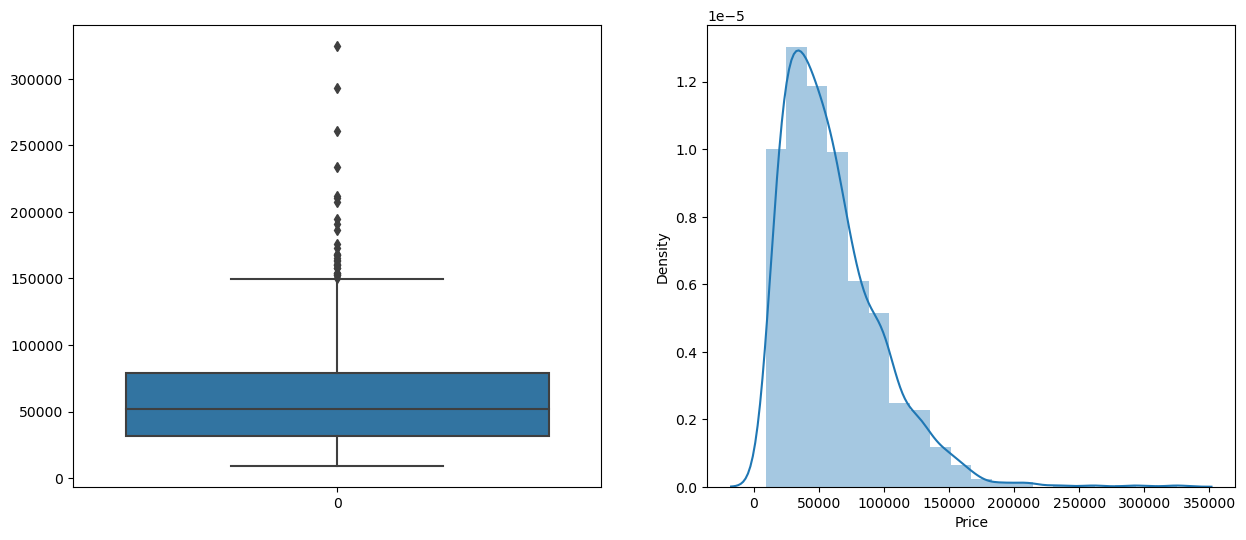

In [78]:
#subplot contain boxplot for price column and distplot for price column
def plot(df,variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.boxplot(df[variable])
    plt.subplot(1,2,2)
    sns.distplot(df[variable],bins=20)
    plt.show()

plot(df,'Price')

**Insight**:
The data is bit skwed and there are outliers in the data. We will treat the outliers in the data.

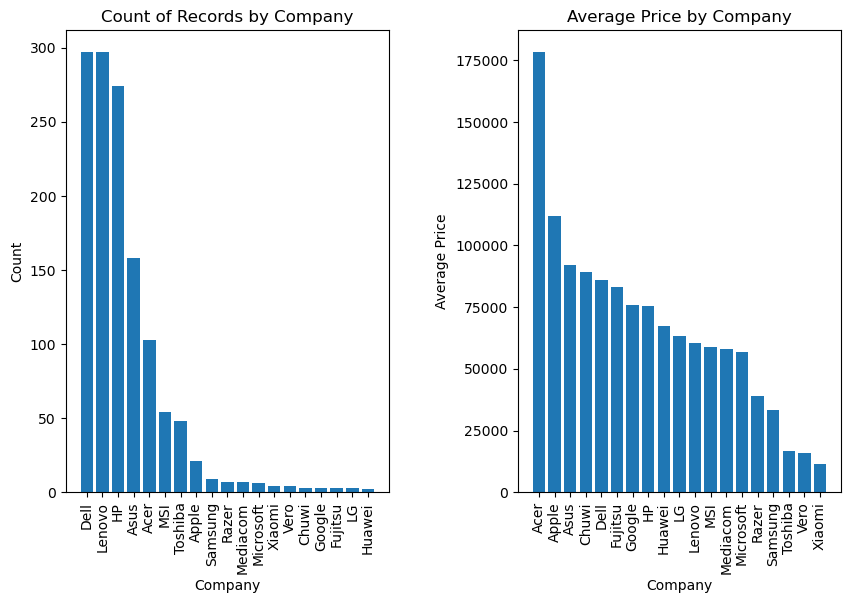

In [79]:
#checking the name of the companies with highest sales and higest price

# Creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the first bar chart on the first subplot
axs[0].bar(df['Company'].value_counts().index, df['Company'].value_counts().sort_values(ascending=False))
axs[0].set_xlabel('Company')
axs[0].set_ylabel('Count')
axs[0].set_title('Count of Records by Company')
axs[0].tick_params(axis='x', rotation=90)

# Plotting the second bar chart on the second subplot
axs[1].bar(df.groupby('Company')['Price'].mean().index, df.groupby('Company')['Price'].mean().sort_values(ascending=False))
axs[1].set_xlabel('Company')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price by Company')
axs[1].tick_params(axis='x', rotation=90)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Displaying the plot
plt.show()


**Insight**:
The higest number of laptops are from the brand **Dell, Lenove and HP** and the lowest number of laptops are from **LG and Huawei**.

**Insight**:
The highest price laptop are from the brand **Razor** and the lowest price laptop are from the brand **Xiaomi and Vero.**

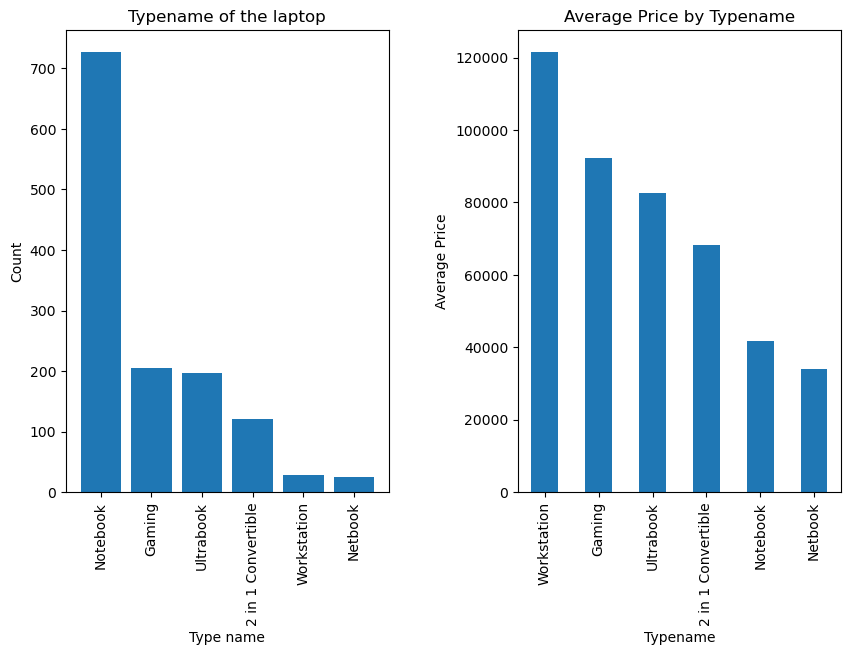

In [80]:
#checking the Ttpename of the companies and type name by price

# Creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the first bar chart on the first subplot
axs[0].bar(df['TypeName'].value_counts().index, df['TypeName'].value_counts().sort_values(ascending=False))
axs[0].set_xlabel('Type name')
axs[0].set_ylabel('Count')
axs[0].set_title('Typename of the laptop')
axs[0].tick_params(axis='x', rotation=90)

# Plotting the second bar chart on the second subplot
axs[1] = df.groupby('TypeName')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
axs[1].set_xlabel('Typename')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price by Typename')
axs[1].tick_params(axis='x', rotation=90)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Displaying the plot
plt.show()


**Insight:**
The highest number of laptops typename are **Notebook and gaming** the lowest number of laptops typenames are **Workstation and netbook**.

**Insight:**
The highest number of laptops typename average by price are **Workstation and gaming** the lowest number of laptops typenames are **Notebook and netbook**.



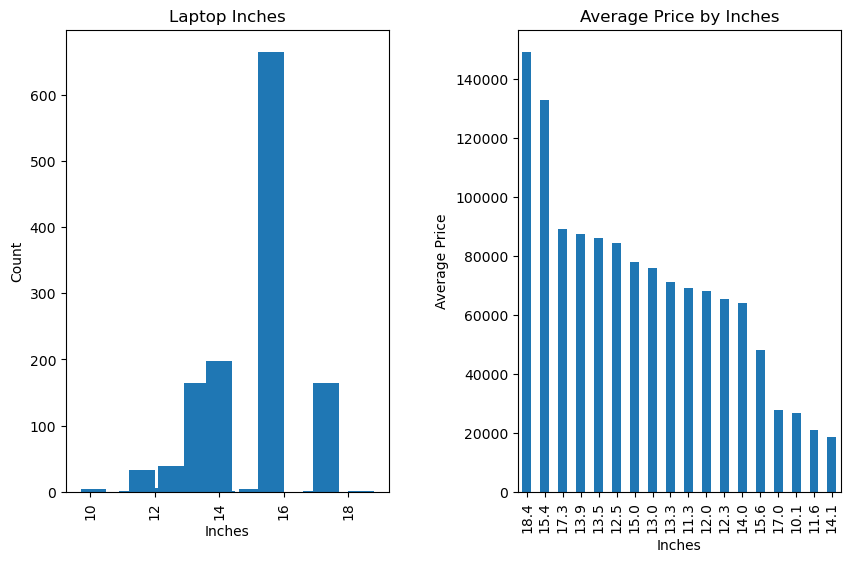

In [81]:
#checking the inches of the laptops and spike of price with inches

# Creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the first bar chart on the first subplot
axs[0].bar(df['Inches'].value_counts().index, df['Inches'].value_counts().sort_values(ascending=False))
axs[0].set_xlabel('Inches')
axs[0].set_ylabel('Count')
axs[0].set_title('Laptop Inches')
axs[0].tick_params(axis='x', rotation=90)

# Plotting the second bar chart on the second subplot
axs[1] = df.groupby('Inches')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
axs[1].set_xlabel('Inches')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price by Inches')
axs[1].tick_params(axis='x', rotation=90)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Displaying the plot
plt.show()


***Insight:***
The highest number of laptops are sold of **15.6 inches**.

***Insight:***
The price of laptops are increasing with the increase in the screen size.

In [82]:
#checking the values in the screen resolution colums
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [83]:
#extracting the touch screen from the screen resolution column 
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1200,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,AMD Radeon R7 M440,Windows 10,2.30,26586.720,0
732,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series A9-9420 3GHz,6,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.10,34632.000,0
608,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,2.00,69210.720,1
433,Lenovo,Workstation,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7600U 2.8GHz,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.30,130269.600,0
270,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8,512GB SSD,Intel Iris Graphics 550,macOS,1.37,104370.192,0


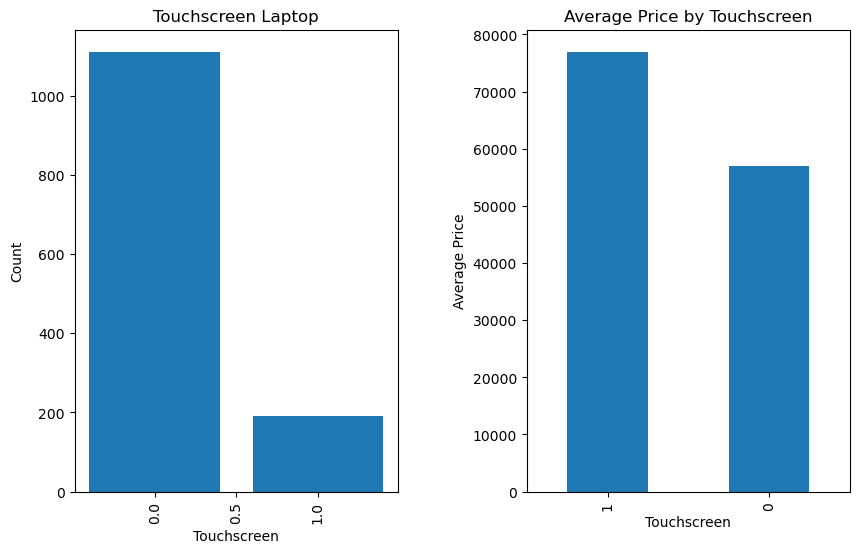

In [84]:
#checking the touch screen of the laptops and spike of price with touch screen

# Creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the first bar chart on the first subplot
axs[0].bar(df['Touchscreen'].value_counts().index, df['Touchscreen'].value_counts().sort_values(ascending=False))
axs[0].set_xlabel('Touchscreen')
axs[0].set_ylabel('Count')
axs[0].set_title('Touchscreen Laptop')
axs[0].tick_params(axis='x', rotation=90)

# Plotting the second bar chart on the second subplot
axs[1] = df.groupby('Touchscreen')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
axs[1].set_xlabel('Touchscreen')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price by Touchscreen')
axs[1].tick_params(axis='x', rotation=90)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Displaying the plot
plt.show()


In [85]:
#extracting the ips from the screen resolution column
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
396,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon RX 550,Windows 10,2.1,65510.9568,0,1
1004,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.2,63669.6000,0,0
963,Toshiba,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.1,95371.2000,1,0
393,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7,71874.7200,0,0
403,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Linux,2.5,46833.1200,0,0


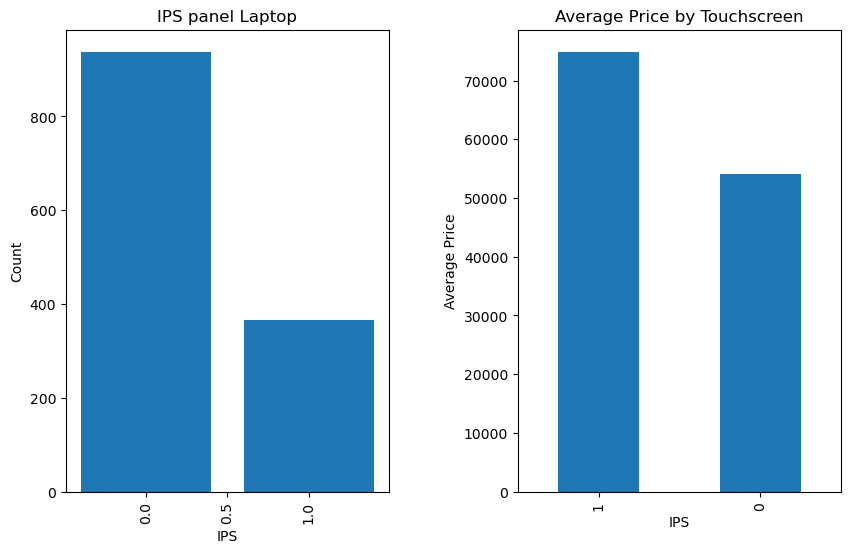

In [86]:
#checking the IPS panel of the laptops and spike of price with IPS panel

# Creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the first bar chart on the first subplot
axs[0].bar(df['IPS'].value_counts().index, df['IPS'].value_counts().sort_values(ascending=False))
axs[0].set_xlabel('IPS')
axs[0].set_ylabel('Count')
axs[0].set_title('IPS panel Laptop')
axs[0].tick_params(axis='x', rotation=90)

# Plotting the second bar chart on the second subplot
axs[1] = df.groupby('IPS')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
axs[1].set_xlabel('IPS')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price by Touchscreen')
axs[1].tick_params(axis='x', rotation=90)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Displaying the plot
plt.show()


In [87]:
#extracting the resolution of the screen
new=df['ScreenResolution'].str.split('x',expand=True)
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [88]:
df['x_res']=new[0]
df['y_res']=new[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6830,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [89]:
#now extracting screen resolution from the x_res column
df['x_res']=df['x_res'].str.replace(',',' ').str.extract('(\d+)').astype('int')

In [90]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6830,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [91]:
#converting the datatype of y_res column
df['y_res']=df['y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [92]:
df.corr()['Price'].sort_values(ascending=False)

C:\Users\Haseeb\AppData\Local\Temp\ipykernel_12252\2868777835.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'].sort_values(ascending=False)


Price          1.000000
Ram            0.743007
y_res          0.552809
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
x_res          0.083832
Inches         0.068197
Name: Price, dtype: float64

In [93]:
#calculation for making the ppi column
df['ppi']=(((df['x_res']**2+df['y_res']**2))**0.5/df['Inches']).astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64

In [94]:
#now cchecking the correlation of ppi with price
df.corr()['Price'].sort_values(ascending=False)

C:\Users\Haseeb\AppData\Local\Temp\ipykernel_12252\811791616.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'].sort_values(ascending=False)


Price          1.000000
Ram            0.743007
y_res          0.552809
ppi            0.348331
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
x_res          0.083832
Inches         0.068197
Name: Price, dtype: float64

In [95]:
#droping the screen resolution column
df.drop(columns=['ScreenResolution'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   Price        1303 non-null   float64
 10  Touchscreen  1303 non-null   int64  
 11  IPS          1303 non-null   int64  
 12  x_res        1303 non-null   int32  
 13  y_res        1303 non-null   int32  
 14  ppi          1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64(2), object(6)
memory usage: 132.5+ KB


In [96]:
#droping x_res,y_res and inches column
df.drop(columns=['x_res','y_res','Inches'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  ppi          1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(2), object(6)
memory usage: 112.1+ KB


In [97]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [98]:
#extracting the first 3 words from the cpu column and storing it as the string
df['Cpu brand']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6830,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [99]:
#create a function for the cpu brand
def fetch_processor(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text

    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"


In [100]:
df['Cpu name']=df['Cpu brand'].apply(fetch_processor)
df.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6830,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


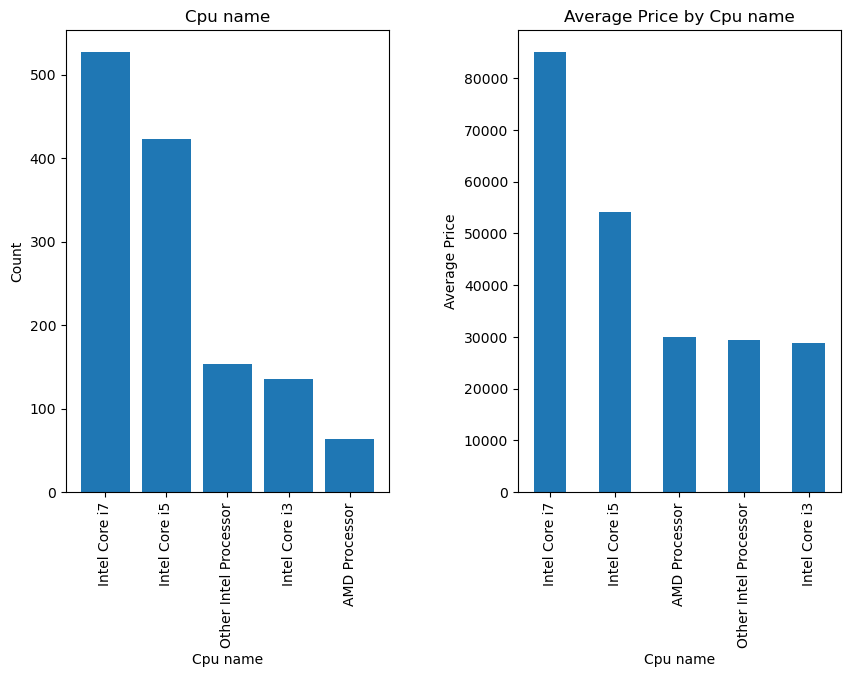

In [101]:
#checking the cpu name of the laptops and spike of price with cpu name

# Creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the first bar chart on the first subplot
axs[0].bar(df['Cpu name'].value_counts().index, df['Cpu name'].value_counts().sort_values(ascending=False))
axs[0].set_xlabel('Cpu name')
axs[0].set_ylabel('Count')
axs[0].set_title('Cpu name')
axs[0].tick_params(axis='x', rotation=90)

# Plotting the second bar chart on the second subplot
axs[1] = df.groupby('Cpu name')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
axs[1].set_xlabel('Cpu name')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price by Cpu name')
axs[1].tick_params(axis='x', rotation=90)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Displaying the plot
plt.show()


In [102]:
#droping the cpu and cpu brand column
df.drop(columns=['Cpu', 'Cpu brand'],axis=1,inplace=True)


In [103]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6830,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


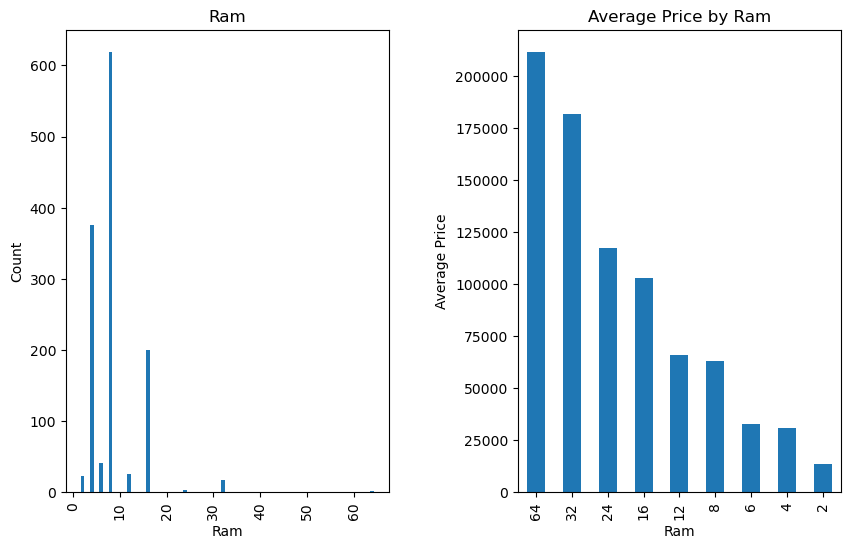

In [104]:
#checking the ram of the laptops and spike of price with ram

# Creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the first bar chart on the first subplot
axs[0].bar(df['Ram'].value_counts().index, df['Ram'].value_counts().sort_values(ascending=False))
axs[0].set_xlabel('Ram')
axs[0].set_ylabel('Count')
axs[0].set_title('Ram')
axs[0].tick_params(axis='x', rotation=90)

# Plotting the second bar chart on the second subplot
axs[1] = df.groupby('Ram')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
axs[1].set_xlabel('Ram')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price by Ram')
axs[1].tick_params(axis='x', rotation=90)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Displaying the plot
plt.show()


In [105]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [106]:
#makeing 4 new columns for memory according to the memory used in the laptop
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\Haseeb\AppData\Local\Temp\ipykernel_12252\3004263617.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Haseeb\AppData\Local\Temp\ipykernel_12252\3004263617.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [107]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6830,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [108]:
#droping memory column
df.drop(columns=['Memory'],axis=1,inplace=True)

In [109]:
#checking correlation of the columns with price
df.corr()['Price'].sort_values(ascending=False)

C:\Users\Haseeb\AppData\Local\Temp\ipykernel_12252\2979061114.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'].sort_values(ascending=False)


Price            1.000000
Ram              0.743007
SSD              0.670799
ppi              0.348331
IPS              0.252208
Weight           0.210370
Touchscreen      0.191226
Hybrid           0.007989
Flash_Storage   -0.040511
HDD             -0.096441
Name: Price, dtype: float64

**Insight**: After checking the correlation of price with ssd, hdd, flash storage and hybrid we can see that the price is highly correlated with ssd. So we will drop the hybrid and flash storage column.

In [110]:
#droping columns
df.drop(columns=['Hybrid','Flash_Storage'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   IPS          1303 non-null   int64  
 9   ppi          1303 non-null   float64
 10  Cpu name     1303 non-null   object 
 11  HDD          1303 non-null   int64  
 12  SSD          1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 122.3+ KB


In [111]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [112]:
df['gpu brand']=df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu name,HDD,SSD,gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6830,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [113]:
df['gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu brand, dtype: int64

In [114]:
#removing the row with 1 arm gpu
df = df[df['gpu brand'] !='ARM']


In [115]:
#ARM GPU is removed
df['gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu brand, dtype: int64

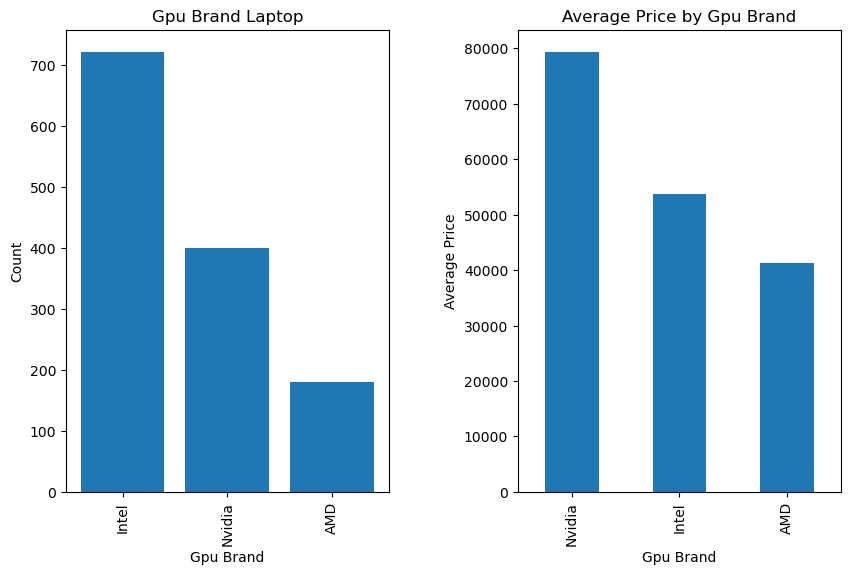

In [116]:
#checking the gpu of the laptops and spike of price with gpu

# Creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the first bar chart on the first subplot
axs[0].bar(df['gpu brand'].value_counts().index, df['gpu brand'].value_counts().sort_values(ascending=False))
axs[0].set_xlabel('Gpu Brand')
axs[0].set_ylabel('Count')
axs[0].set_title('Gpu Brand Laptop')
axs[0].tick_params(axis='x', rotation=90)

# Plotting the second bar chart on the second subplot
axs[1] = df.groupby('gpu brand')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
axs[1].set_xlabel('Gpu Brand')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price by Gpu Brand')
axs[1].tick_params(axis='x', rotation=90)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Displaying the plot
plt.show()


In [117]:
#droping gpu column
df.drop(columns=['Gpu'],axis=1,inplace=True)

In [118]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu name,HDD,SSD,gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6830,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


In [119]:
#checking the value counts of the operating system
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [120]:
#create a function for the operating system
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
        
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [121]:
df['os']=df['OpSys'].apply(cat_os)
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu name,HDD,SSD,gpu brand,os
1118,Toshiba,Ultrabook,16,Windows 10,1.05,118601.2800,0,0,165.632118,Intel Core i7,0,512,Intel,Windows
941,Asus,Notebook,4,Windows 10,2.80,28238.4000,0,0,106.113062,Other Intel Processor,1000,0,Nvidia,Windows
766,Asus,Notebook,4,Windows 10,2.80,25059.7152,0,0,90.583402,Other Intel Processor,1000,0,Nvidia,Windows
241,Asus,Notebook,8,Windows 10,2.10,61005.6000,0,0,127.335675,Intel Core i7,1000,128,Nvidia,Windows
1040,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,45128.1600,1,1,141.211998,Intel Core i7,0,256,Intel,Windows


In [122]:
#droping the operating system column
df.drop(columns=['OpSys'],axis=1,inplace=True)

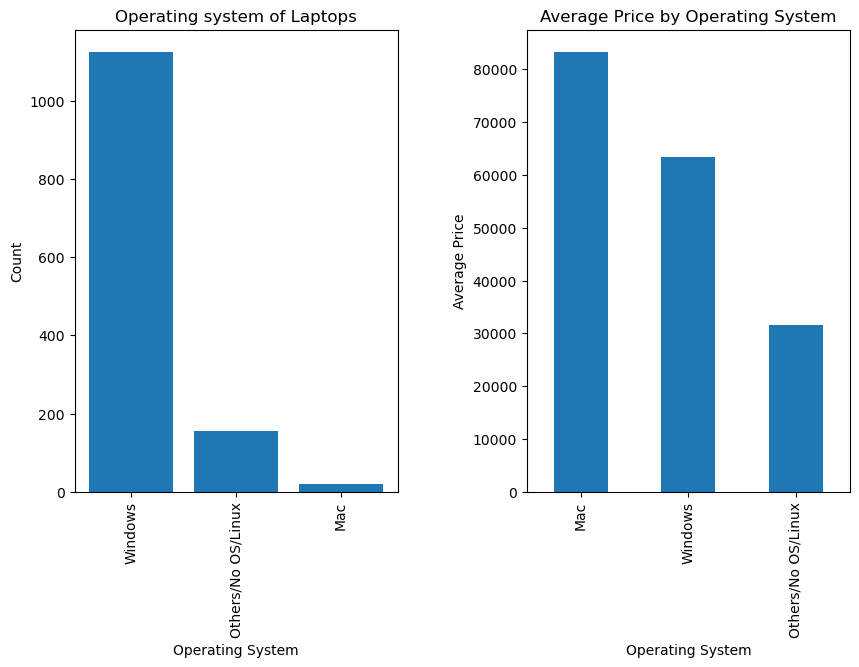

In [123]:
#checking the Operating system of the laptops and spike of price with Operating system

# Creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plotting the first bar chart on the first subplot
axs[0].bar(df['os'].value_counts().index, df['os'].value_counts().sort_values(ascending=False))
axs[0].set_xlabel('Operating System')
axs[0].set_ylabel('Count')
axs[0].set_title('Operating system of Laptops')
axs[0].tick_params(axis='x', rotation=90)

# Plotting the second bar chart on the second subplot
axs[1] = df.groupby('os')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
axs[1].set_xlabel('Operating System')
axs[1].set_ylabel('Average Price')
axs[1].set_title('Average Price by Operating System')
axs[1].tick_params(axis='x', rotation=90)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Displaying the plot
plt.show()


**Insight**: The highest number of laptops are **Windows OS laptops** resolution.

**Insight**: The highest price laptops regarding to the OS are **Apple**.

C:\Users\Haseeb\AppData\Local\Temp\ipykernel_12252\4040150459.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],bins=20)


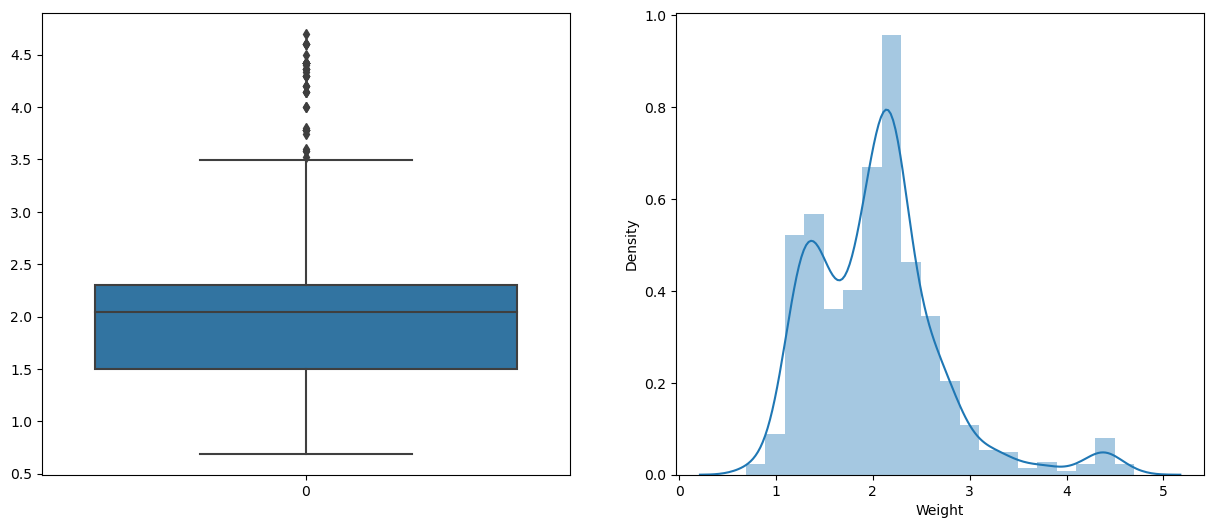

In [124]:
#weight column
plot(df,'Weight')



<Axes: xlabel='Weight', ylabel='Price'>

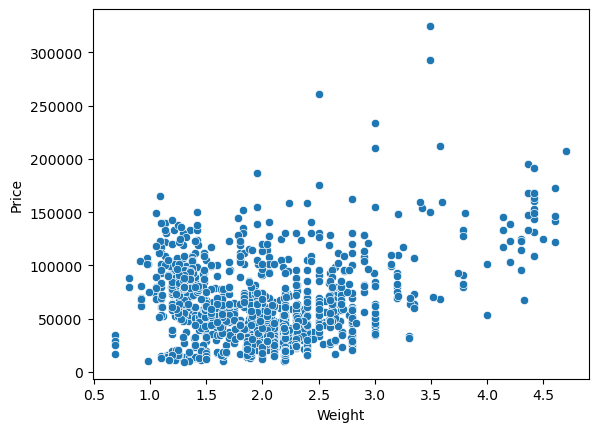

In [125]:
sns.scatterplot(x='Weight',y='Price',data=df)

C:\Users\Haseeb\AppData\Local\Temp\ipykernel_12252\239855008.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis')


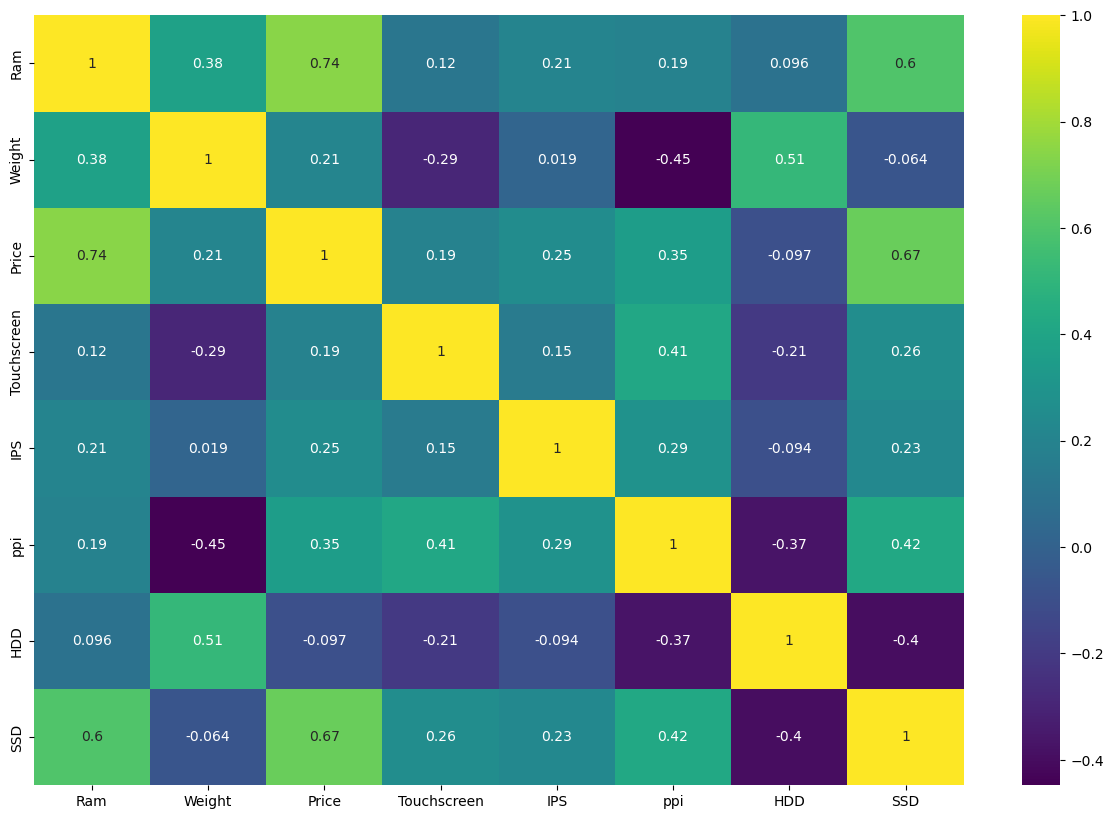

In [126]:
#checking correlation with heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

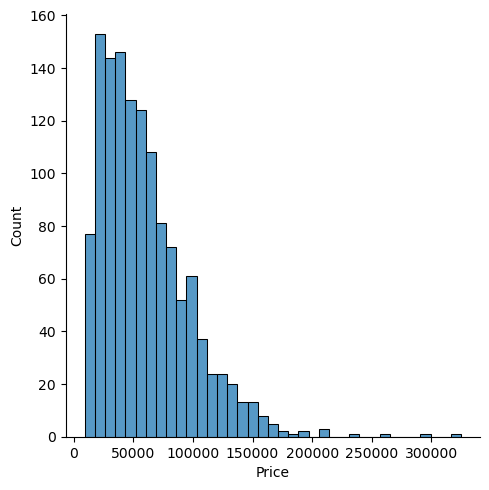

In [127]:
#ploting the target column "Price"
sns.displot(df['Price'])

**Insight**: The column values are **skewed**.

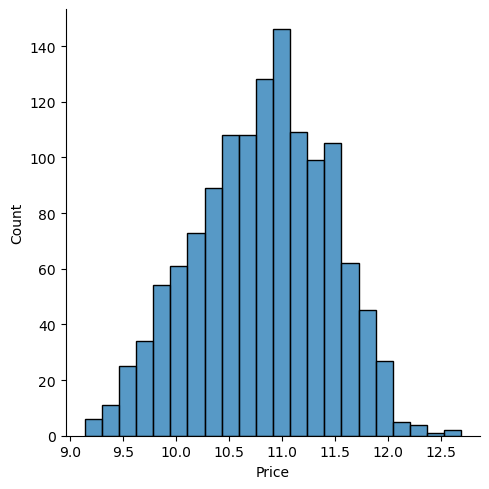

In [128]:
sns.displot(np.log(df['Price']))

In [129]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu name,HDD,SSD,gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6830,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [141]:
#saving the dataset as modified_dataset to use in another notebook
df.to_csv('modified_dataset.csv', index=False)


In [142]:
modified_dataset = pd.read_csv('modified_dataset.csv')
modified_dataset.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu name,HDD,SSD,gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6830,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
